In [1]:
import scipy
import numpy as np
import pandas as pd
import plotly as py
import seaborn as sns
import scipy.stats as stats
import plotly.graph_objs as go
import matplotlib.gridspec as gridspec
from matplotlib.widgets import Slider

## Описание датасета
#### Датасет содержит данные о машинах для прогнозируемого технического обслуживания
#### Цель - прогнозирование тенденций на рынке аренды

| Признак | Описание |
|:-------:|:--------:|
| UDI | уникальный идентификатор в диапазоне от 1 до 10000 |
| productID | состоит из букв L, M или H, обозначающих качество продукции, серийного номера, соответствующего конкретному варианту | 
| air temperature [K] | температура воздуха | 
| process temperature [K] | температура процесса во время работы двигателя |
| rotational speed [rpm] | частота вращения с учетом нормально распределенного шума |
| torque [Nm] | крутящий момент | 
| tool wear [min] | износ инструмента. Варианты качества H/M/L увеличивают износ инструмента |
| Target | Провал или нет |
| Failure Type | Тип неисправности |



In [2]:
df = pd.read_csv("predictive_maintenance.csv")

In [3]:
df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


### 1. Зависимость износа инcтрумента (tool wear) и тип неисправности (Failure Type)

In [4]:
df= df.rename(columns={"Air temperature [K]": "Air Temp", "Process temperature [K]": "Process Temp", "Rotational speed [rpm]": "Rotational Speed", "Torque [Nm]":"Torque", "Tool wear [min]":"Tool wear"})

In [5]:
df.head(5)

,UDI,Product ID,Type,Air Temp,Process Temp,Rotational Speed,Torque,Tool wear,Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


/home/vlad/3_Semestr/Data Visualization/Labs/vis_engine/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1351: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Tool wear', ylabel='Failure Type'>

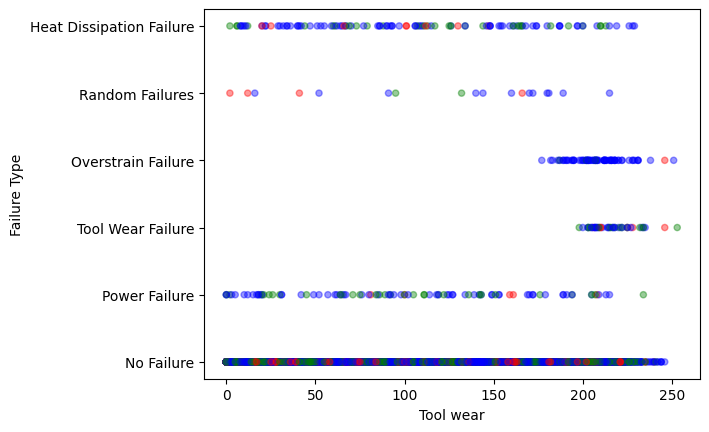

In [6]:
color_map = {'L': 'blue', 'M': 'green', 'H': 'red'}

df['color'] = df['Type'].map(color_map)

df.plot(
    kind="scatter",
    x="Tool wear",
    y="Failure Type",
    alpha=0.4,
    c=df['color'],
    colormap='viridis'
)


### 2. Гистограмма износа инструмента

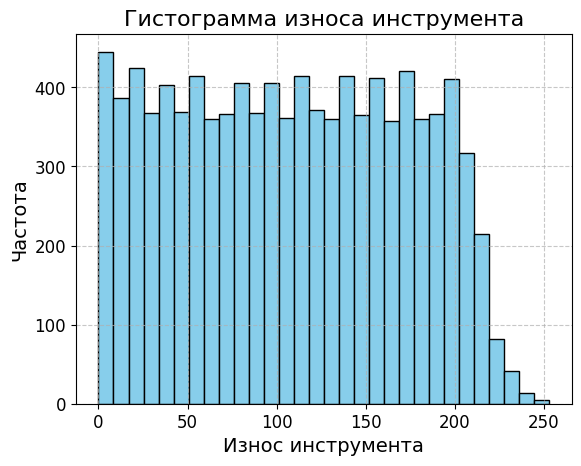

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

ax = df['Tool wear'].hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Износ инструмента', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.title('Гистограмма износа инструмента', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.show()


### 3. График плотности для Torque

/tmp/ipykernel_29206/29915477.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df, x='Torque', shade=True)


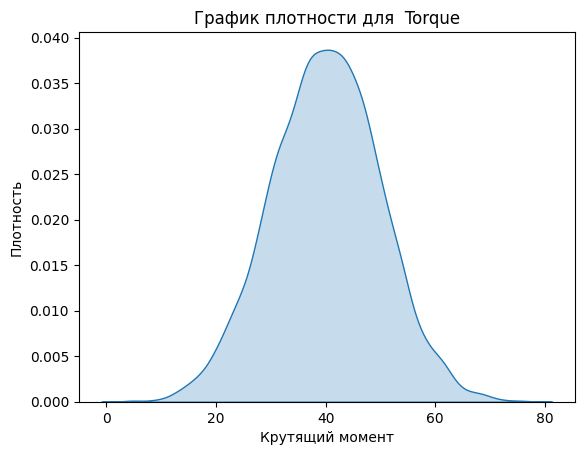

In [16]:
sns.kdeplot(df, x='Torque', shade=True)
plt.title('График плотности для  Torque')
plt.xlabel('Крутящий момент')
plt.ylabel('Плотность')
plt.show()

### 4. Зависимость Процессной температуры (process temperature) и частоты вращения (rotational speed):

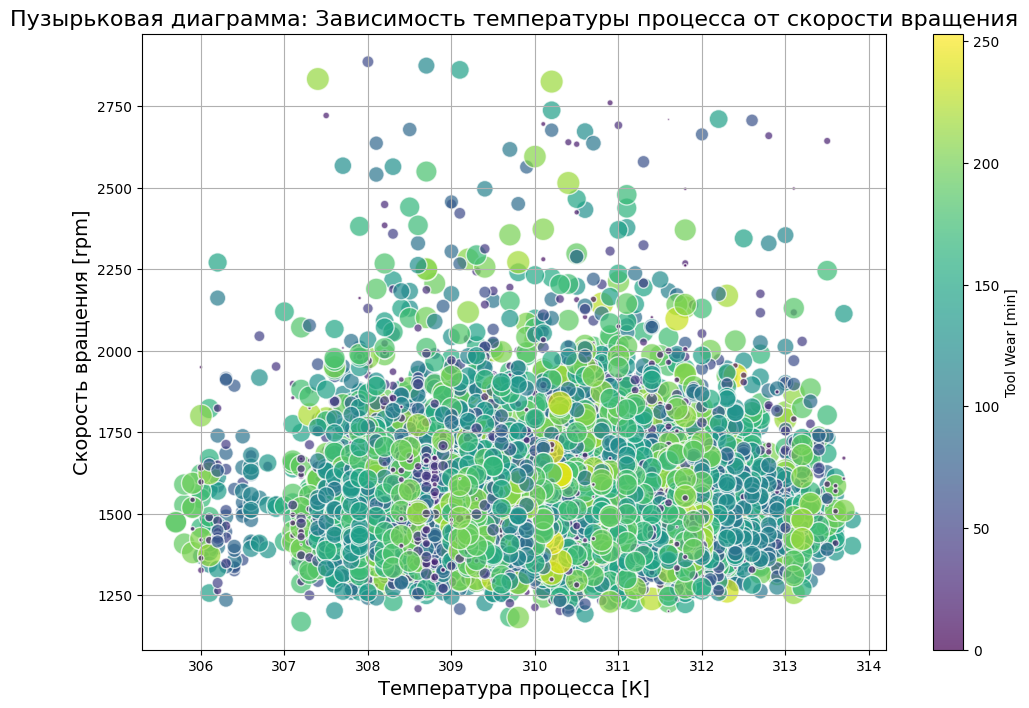

In [17]:
plt.figure(figsize=(12, 8))
plt.scatter(
    df['Process Temp'],
    df['Rotational Speed'],
    s=df['Tool wear']*1.3,  
    c=df['Tool wear'], 
    cmap='viridis',
    alpha=0.7,
    edgecolors='w'
)

plt.colorbar(label='Tool Wear [min]')

plt.xlabel('Температура процесса [К]', fontsize=14)
plt.ylabel('Скорость вращения [rpm]', fontsize=14)
plt.title('Пузырьковая диаграмма: Зависимость температуры процесса от скорости вращения', fontsize=16)

plt.grid(True)
plt.show()


### 5.Диаграмма размаха зависимости типа неисправности (Failure Type) от Крутящего моммента (Torque) 

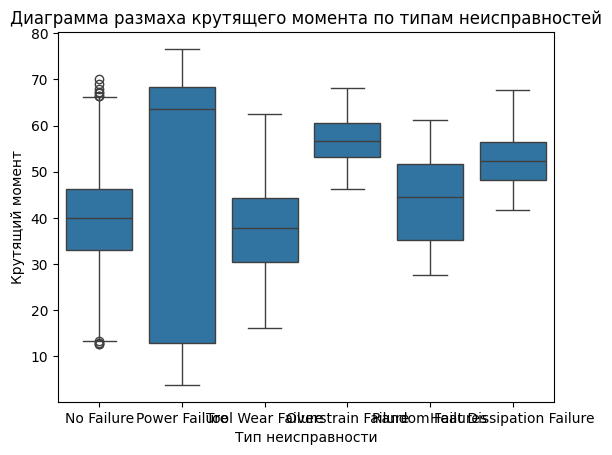

In [21]:
sns.boxplot(x='Failure Type', y='Torque', data=df)
plt.xlabel('Тип неисправности')
plt.ylabel('Крутящий момент')
plt.title('Диаграмма размаха крутящего момента по типам неисправностей')
plt.show()


### 6.Линейный график зависимости типа неисправности (Failure Type) от Крутящего моммента (Torque) 

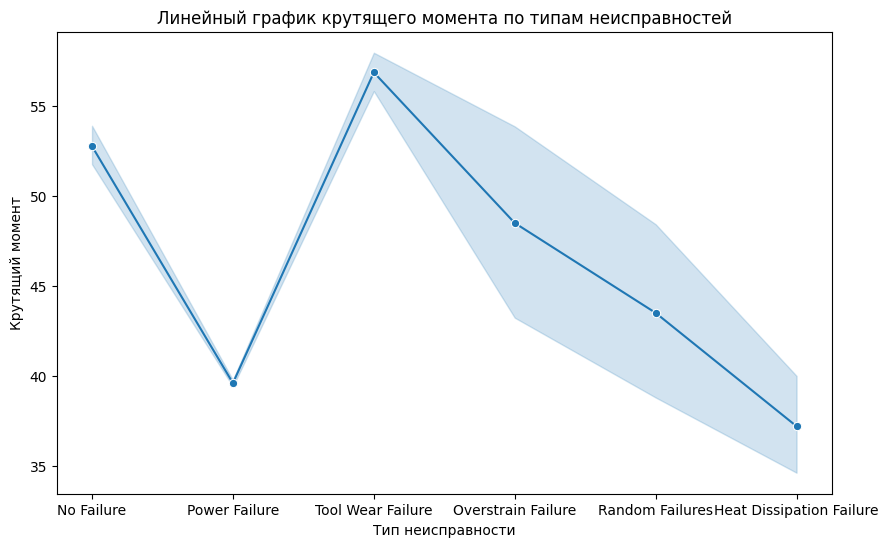

In [19]:
df['Failure Type Code'] = pd.Categorical(df['Failure Type']).codes

plt.figure(figsize=(10, 6))
sns.lineplot(x='Failure Type Code', y='Torque', data=df, marker='o')
plt.xticks(ticks=range(len(df['Failure Type'].unique())), labels=df['Failure Type'].unique())
plt.title('Линейный график крутящего момента по типам неисправностей')
plt.xlabel('Тип неисправности')
plt.ylabel('Крутящий момент')
plt.show()


### 7.Линейный график зависимости изменения температуры воздуха [K] по "UDI":

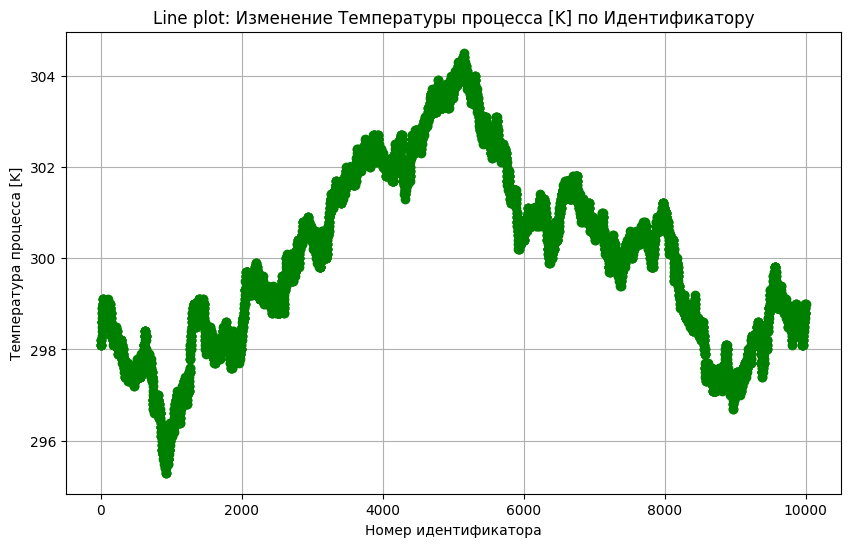

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(df['UDI'], df['Air Temp'], marker='o', linestyle='-', color='green')
plt.title('Line plot: Изменение Температуры процесса [K] по Идентификатору')
plt.xlabel('Номер идентификатора')
plt.ylabel('Температура процесса [K]')
plt.grid(True)
plt.show()

## 8.Диаграмма рассеяния с регрессионной линией

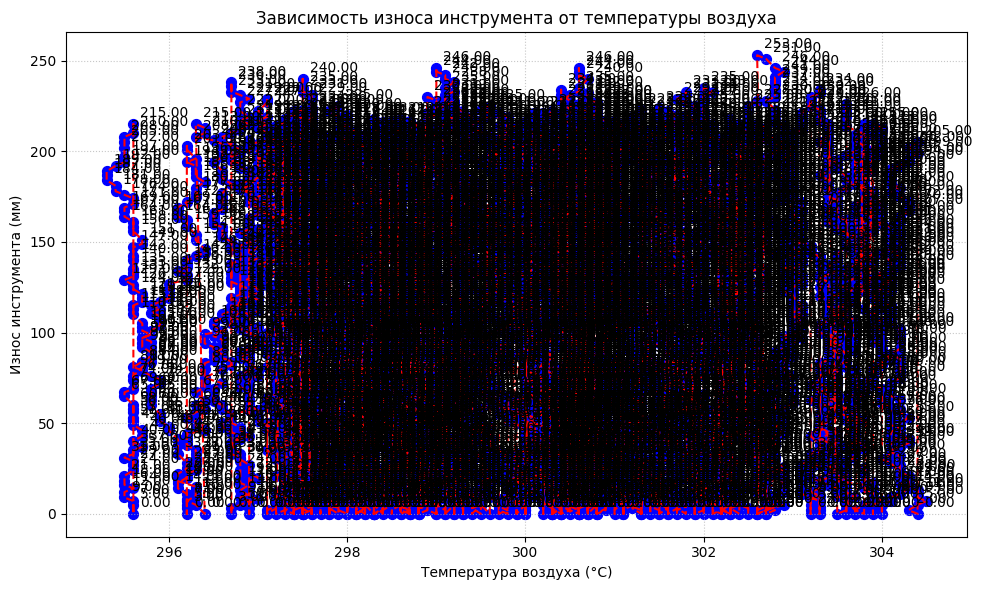

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Air Temp"], df["Tool wear"], color='blue', s=50)
plt.plot(df["Air Temp"], df["Tool wear"], color='red', linestyle='--')

plt.xlabel('Температура воздуха (°C)')
plt.ylabel('Износ инструмента (мм)')
plt.title('Зависимость износа инструмента от температуры воздуха')

plt.grid(True, linestyle=':', alpha=0.7)

for i, row in df.iterrows():
    plt.annotate(f'{row["Tool wear"]:.2f}', (row["Air Temp"], row["Tool wear"]), 
                 xytext=(5, 5), textcoords='offset points')
    
plt.tight_layout()
plt.show()

### 9.Диаграмма рассеивания: крутящий момент от скорости Вращения

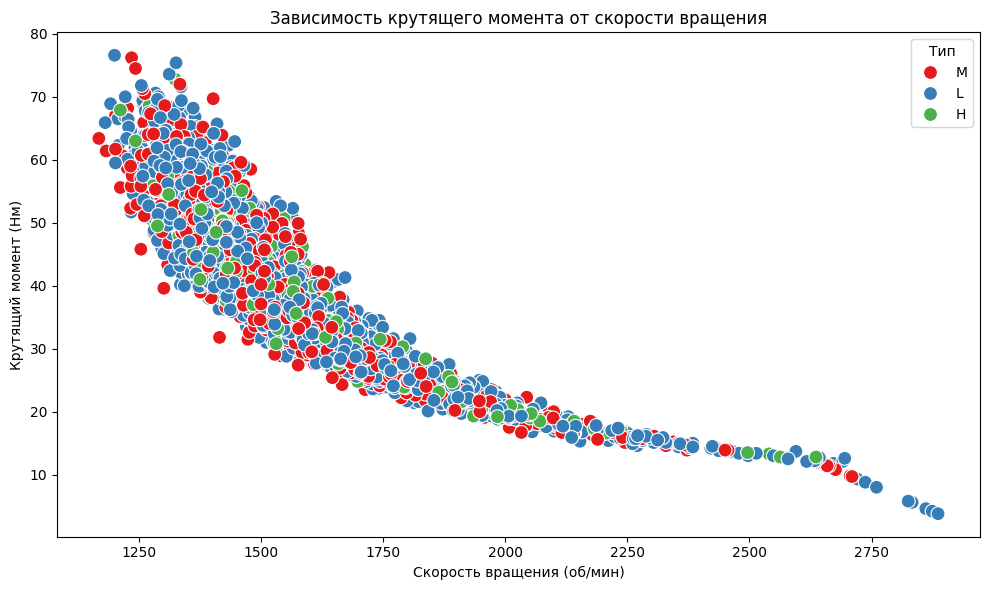

In [14]:
# График 1: Зависимость крутящего момента от скорости вращения
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Rotational Speed', y='Torque', hue='Type', palette='Set1', s=100)
plt.title('Зависимость крутящего момента от скорости вращения')
plt.xlabel('Скорость вращения (об/мин)')
plt.ylabel('Крутящий момент (Нм)')
plt.legend(title='Тип')
plt.tight_layout()
plt.show()
